## Assignment 2 : Convolutional Neural Networks (CNN)

CIFAR10 dataset is used to train a CNN model with a new dataset, taking only 6 animal classes out of this ten-class CIFAR10 dataset. In CFAR10, classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. A new dataset is included that contains bird, cat, deer, dog, frog, horse classes.
</br> 
In this notebook also I use data augmentation, which increases the number of images to train the model.
</br>

In [ ]:
# load the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
%matplotlib inline
from IPython.display import Image


### Part 1: Pre-processing dataset and Model training

#### Loading and  pre-processing dataset: CFAR10 dataset

In [ ]:
#load and process the cifar10 dataset. 
(x_train, y_train),(x_test_full,y_test_full) = cifar10.load_data()
# x_train /=255
# x_test_full  /=255



print(x_train.shape)
print(x_test_full.shape)
print(y_train.shape)
print(y_test_full.shape)


(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


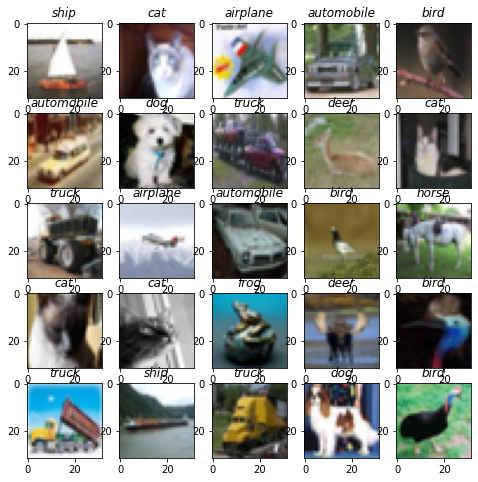

In [ ]:
# plot some figures and their classes
np.random.seed(42)
names_of_classes = ['airplane', 'automobile',	'bird', 'cat', 'deer', 'dog','frog','horse', 'ship', 'truck'] 

fig, axis = plt.subplots(5,5,figsize=(8,8))
for i in range(5):
    for j in range(5):
        rand_index = np.random.randint(0,5001)
        axis[i,j].imshow(x_train[rand_index])
        axis[i,j].set_title(names_of_classes[y_train[rand_index,0]], fontstyle='italic')


In [ ]:
# CFAR10 classes: airplane, automobile,	bird, cat, deer, dog, frog, horse, ship, truck
# create a new dataset by geting animal classes namely : bird, cat, deer, dog, frog, horse
# your new dataset must include only 6 classes (bird, cat, deer, dog, frog, horse) in the train and test datasets.

y_animal_train = []
x_animal_train = np.zeros([30000, 32, 32, 3])
y_animal_test_full =  []
x_animal_test_full = np.zeros([6000, 32, 32, 3])
count = 0

for i in range(50000):
  if y_train[i,0]>=2 and y_train[i,0]<=7:
     y_animal_train.append(y_train[i,0])
     x_animal_train[count] = x_train[i]
     count = count+1

count = 0 
for i in range(10000):
  if y_test_full[i,0]>=2 and y_test_full[i,0]<=7:
     y_animal_test_full.append(y_test_full[i,0])
     x_animal_test_full[count] = x_test_full[i]
     count = count+1



In [ ]:
# pre-process your dataset to make it suitable for training
# update labels starting from 0 for the train and test datasets
# create validation dataset from test dataset.
y_animal_train =  np.array(y_animal_train)
y_animal_test_full =  np.array(y_animal_test_full)

x_animal_train = x_animal_train.astype('float32')
x_animal_test = x_animal_test_full.astype('float32')
x_animal_train /=255
x_animal_test_full  /=255

for i in range(30000):
  y_animal_train [i] = y_animal_train[i]-2


for i in range(6000):
  y_animal_test_full [i] = y_animal_test_full[i]-2

# print(y_animal_train[:50])
# print(y_animal_test_full[:50])   

x_animal_test , x_animal_valid = x_animal_test_full[:-500], x_animal_test_full[-500:]

y_animal_test , y_animal_valid = y_animal_test_full[:-500], y_animal_test_full[-500:]


x_animal_mean = x_animal_train.mean(axis=0, keepdims=True)
x_animal_std = x_animal_train.std(axis=0, keepdims=True) + 1e-7
x_animal_train = (x_animal_train - x_animal_mean) / x_animal_std
x_animal_valid = (x_animal_valid - x_animal_mean) / x_animal_std
x_animal_test =  (x_animal_test - x_animal_mean) / x_animal_std







#### Creating and Training the CNN model

In [ ]:
print(x_animal_train.shape)
print(y_animal_train.shape)


(30000, 32, 32, 3)
(30000,)


In [ ]:
# create  and compile your CNN model
from tensorflow import keras
from tensorflow.keras import models
# from functools import partial
from keras import layers
from keras.layers import Conv2D,MaxPool2D

np.random.seed(42)
tf.random.set_seed(42)

myCNN = models.Sequential([ Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu', padding ='SAME',input_shape = [32,32,3]),#first hidden layer
                            MaxPool2D(pool_size =(2,2), strides = 2),
                            Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu', padding ='SAME'),
                            Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu', padding ='SAME'),
                            MaxPool2D(pool_size =(2,2), strides = 2),
                            Conv2D(filters = 128,  kernel_size =(3,3), activation = 'relu', padding ='SAME'),
                            layers.MaxPooling2D(pool_size =(2,2), strides = 2),

                    
                            #dense
                            layers.Flatten(),
                            layers.Dense(units = 64, activation = 'relu'),
                            layers.Dropout(0.5),
                            layers.Dense(units = 6, activation = 'softmax')
                          ])

myCNN.compile(loss = "sparse_categorical_crossentropy", optimizer = "nadam", metrics = ["accuracy"])


In [ ]:
#show summary 
myCNN.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_43 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 8, 8, 128)       

In [ ]:
# train your model
history = myCNN.fit(x_animal_train,y_animal_train, epochs= 10, validation_data = (x_animal_valid,y_animal_valid))

Epoch 1/10
938/938 [==============================] - 64s 66ms/step - loss: 1.4126 - accuracy: 0.4378 - val_loss: 1.1201 - val_accuracy: 0.5820
Epoch 2/10
938/938 [==============================] - 63s 67ms/step - loss: 1.1050 - accuracy: 0.5871 - val_loss: 0.9531 - val_accuracy: 0.6480
Epoch 3/10
938/938 [==============================] - 62s 66ms/step - loss: 0.9434 - accuracy: 0.6536 - val_loss: 0.8621 - val_accuracy: 0.6940
Epoch 4/10
938/938 [==============================] - 62s 66ms/step - loss: 0.8265 - accuracy: 0.6994 - val_loss: 0.7684 - val_accuracy: 0.7120
Epoch 5/10
938/938 [==============================] - 63s 67ms/step - loss: 0.7342 - accuracy: 0.7323 - val_loss: 0.7359 - val_accuracy: 0.7420
Epoch 6/10
938/938 [==============================] - 63s 67ms/step - loss: 0.6622 - accuracy: 0.7627 - val_loss: 0.7534 - val_accuracy: 0.7120
Epoch 7/10
938/938 [==============================] - 63s 67ms/step - loss: 0.5934 - accuracy: 0.7848 - val_loss: 0.7335 - val_accuracy:

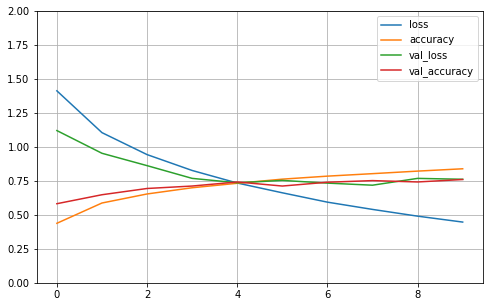

In [ ]:
# plot accuray and loss values for the training and validation dataset
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()


In [ ]:
# calculate accuracy for testing dataset
score = myCNN.evaluate(x_animal_test, y_animal_test)
# score = myCNN.evaluate(x_animal_train, y_animal_train)
# score = myCNN.evaluate(x_animal_valid, y_animal_valid)



172/172 [==============================] - 2s 12ms/step - loss: 0.8756 - accuracy: 0.7325


### Part 2: Using Augmentation

In [ ]:
# Use tf.keras.preprocessing.image.ImageDataGenerator to augment the images (to increase the number of images in dataset for better accuracy)
from tensorflow.keras.preprocessing.image import ImageDataGenerator


MyGenerator = ImageDataGenerator(
                                  featurewise_center=True,
                                  featurewise_std_normalization=True,
                                  rotation_range=60,
                                  width_shift_range=0.5,
                                  height_shift_range=0.5,
#                                   shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip=True,
                                  vertical_flip=True,
                                  fill_mode = 'constant',
                                  validation_split=0.2
                                )

AugmentedFlow = MyGenerator.flow(x_animal_train,y_animal_train)
x_augmented_train = AugmentedFlow.x
y_augmented_train = AugmentedFlow.y

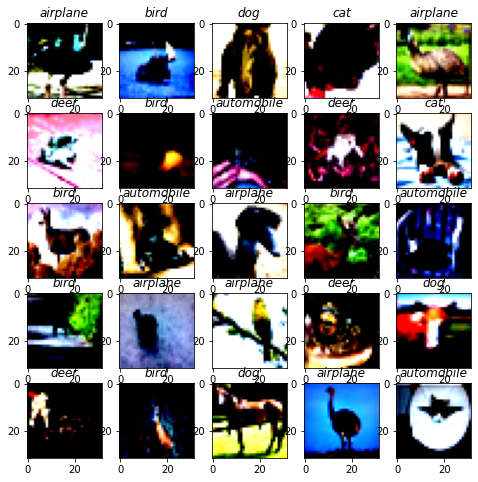

In [ ]:
np.random.seed(42)
names_of_classes = ['airplane', 'automobile',	'bird', 'cat', 'deer', 'dog','frog','horse', 'ship', 'truck'] 

fig, axis = plt.subplots(5,5,figsize=(8,8))
for i in range(5):
    for j in range(5):
        rand_index = np.random.randint(0,5001)
        axis[i,j].imshow(x_augmented_train[rand_index])
        axis[i,j].set_title(names_of_classes[y_augmented_train[rand_index]], fontstyle='italic')

In [ ]:
# use tf.keras.callbacks.EarlyStopping
# tf.keras.callbacks.ReduceLROnPlateau 
# callback function for better training 
from keras import callbacks
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
early_stopping_cb = callbacks.EarlyStopping(patience=10,restore_best_weights=True)
reduceLROnplateau = callbacks.ReduceLROnPlateau(monitor='val_accuracy', mode = 'max', factor=0.2, patience=2, min_lr=0.0005)
checkpoint_cb     = callbacks.ModelCheckpoint("my_keras_model.h5", monitor='val_accuracy', save_best_only=True)


In [ ]:
# Train your model using ImageDataGenerator
# You can use the model that you used in the previous part.
# you can also create a new model for this part
from tensorflow import keras
from tensorflow.keras import models

from keras import layers
from keras.layers import Conv2D,MaxPool2D

np.random.seed(42)
tf.random.set_seed(42)

myAugmentedCNN = models.Sequential([ Conv2D(filters = 32, kernel_size =(3,3), activation = 'relu', padding ='SAME',input_shape = [32,32,3]),#first hidden layer
                            MaxPool2D(pool_size =(2,2), strides = 2),
                            Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu', padding ='SAME'),
                            Conv2D(filters = 64, kernel_size =(3,3), activation = 'relu', padding ='SAME'),
                            MaxPool2D(pool_size =(2,2), strides = 2),
                            Conv2D(filters = 128,  kernel_size =(3,3), activation = 'relu', padding ='SAME'),
                            layers.MaxPooling2D(pool_size =(2,2), strides = 2),
                    
                            #dense
                            layers.Flatten(),
                            layers.Dense(units = 64, activation = 'relu'),
                            layers.Dropout(0.5),
                            layers.Dense(units = 6, activation = 'softmax')
                          ])

myAugmentedCNN.compile(loss = "sparse_categorical_crossentropy", optimizer = "nadam", metrics = ["accuracy"])

In [ ]:
myAugmentedCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         7

In [ ]:
# Train your model using ImageDataGenerator
# You can use the model that you used in the previous part.
# you can also create a new model for this part

augmented_history = myAugmentedCNN.fit(x_augmented_train,y_augmented_train, epochs=50,
                              validation_data = (x_animal_valid,y_animal_valid),
                              callbacks=[early_stopping_cb,checkpoint_cb,reduceLROnplateau]
                             )

Epoch 1/50
938/938 [==============================] - 56s 56ms/step - loss: 1.4126 - accuracy: 0.4378 - val_loss: 1.1201 - val_accuracy: 0.5820 - lr: 0.0010
Epoch 2/50
938/938 [==============================] - 51s 54ms/step - loss: 1.1050 - accuracy: 0.5871 - val_loss: 0.9531 - val_accuracy: 0.6480 - lr: 0.0010
Epoch 3/50
938/938 [==============================] - 55s 58ms/step - loss: 0.9434 - accuracy: 0.6536 - val_loss: 0.8621 - val_accuracy: 0.6940 - lr: 0.0010
Epoch 4/50
938/938 [==============================] - 56s 60ms/step - loss: 0.8265 - accuracy: 0.6994 - val_loss: 0.7684 - val_accuracy: 0.7120 - lr: 0.0010
Epoch 5/50
938/938 [==============================] - 58s 62ms/step - loss: 0.7342 - accuracy: 0.7323 - val_loss: 0.7359 - val_accuracy: 0.7420 - lr: 0.0010
Epoch 6/50
938/938 [==============================] - 58s 62ms/step - loss: 0.6622 - accuracy: 0.7627 - val_loss: 0.7534 - val_accuracy: 0.7120 - lr: 0.0010
Epoch 7/50
938/938 [==============================] - 59s 

In [ ]:
#stopping at the 12th as it was the maximum
augmented_history_12thEpoch = myAugmentedCNN.fit(x_augmented_train,y_augmented_train, epochs=12,
                              validation_data = (x_animal_valid,y_animal_valid),
                              callbacks=[early_stopping_cb,checkpoint_cb,reduceLROnplateau]
                             )

Epoch 1/12
938/938 [==============================] - 56s 57ms/step - loss: 1.4126 - accuracy: 0.4378 - val_loss: 1.1201 - val_accuracy: 0.5820 - lr: 0.0010
Epoch 2/12
938/938 [==============================] - 56s 60ms/step - loss: 1.1050 - accuracy: 0.5871 - val_loss: 0.9531 - val_accuracy: 0.6480 - lr: 0.0010
Epoch 3/12
938/938 [==============================] - 60s 64ms/step - loss: 0.9434 - accuracy: 0.6536 - val_loss: 0.8621 - val_accuracy: 0.6940 - lr: 0.0010
Epoch 4/12
938/938 [==============================] - 58s 62ms/step - loss: 0.8265 - accuracy: 0.6994 - val_loss: 0.7684 - val_accuracy: 0.7120 - lr: 0.0010
Epoch 5/12
938/938 [==============================] - 60s 64ms/step - loss: 0.7342 - accuracy: 0.7323 - val_loss: 0.7359 - val_accuracy: 0.7420 - lr: 0.0010
Epoch 6/12
938/938 [==============================] - 60s 63ms/step - loss: 0.6622 - accuracy: 0.7627 - val_loss: 0.7534 - val_accuracy: 0.7120 - lr: 0.0010
Epoch 7/12
938/938 [==============================] - 59s 

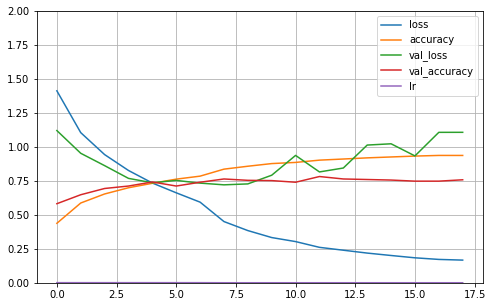

In [ ]:
# plot the accuracy and loss values.
import pandas as pd

pd.DataFrame(augmented_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()



In [ ]:
print(augmented_history.history['val_accuracy'])

[0.5820000171661377, 0.6480000019073486, 0.6940000057220459, 0.7120000123977661, 0.7419999837875366, 0.7120000123977661, 0.7400000095367432, 0.7639999985694885, 0.7540000081062317, 0.7519999742507935, 0.7400000095367432, 0.7820000052452087, 0.7639999985694885, 0.7599999904632568, 0.7559999823570251, 0.7480000257492065, 0.7480000257492065, 0.7580000162124634]


In [ ]:
# calculate the test dataset accuracy
Aug_score = myAugmentedCNN.evaluate(x_animal_test, y_animal_test)
print(Aug_score)

172/172 [==============================] - 2s 10ms/step - loss: 0.9612 - accuracy: 0.7536
[0.9612278342247009, 0.753636360168457]
